In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r1 = np.array([1, 1.5])
r2 = np.array([2, 0])
r3 = np.array([0, 2])
r4 = np.array([0.7, 2])
rewards = [r1, r2, r3, r4]

In [3]:
def plot_rewards(rewards):
    for r in rewards:
        plt.plot([0, 1], r)
    plt.xlim([0, 1])
    plt.gca().set_ylim(bottom=0)
    plt.xlabel("P(s=s1)")
    plt.ylabel("Reward")

In [4]:
def get_b_m(r):
    b = r[0]
    m = r[1] - r[0]
    return b, m
    
def compute_intersect(r1, r2):
    b1, m1 = get_b_m(r1)
    b2, m2 = get_b_m(r2)
    if np.isclose(m2 - m1, 0):
        return None
    return (b2 - b1)/(m1 - m2)
   
def compute_segment(r, rewards):
    lb, ub = 0, 1
    for r_prime in rewards:
        if np.all(r >= r_prime):
            continue
        x = compute_intersect(r, r_prime)
        if x is not None and 0 <= x <= 1:
            _, m1 = get_b_m(r)
            _, m2 = get_b_m(r_prime)
            if m1 > m2:
                lb = max(lb, x)
            else:
                ub = min(ub, x)
    return lb, ub

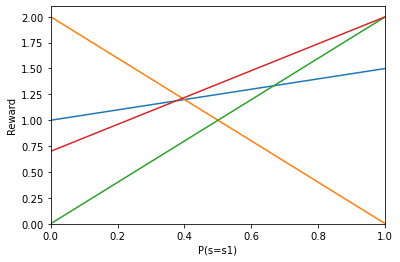

In [6]:
plot_rewards(rewards)
new_rewards = []
for r in rewards:
    lb, ub = compute_segment(r, rewards)
    if lb > ub or np.isclose(lb, ub):
        continue
    new_rewards.append(r)

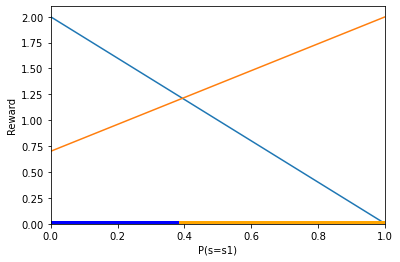

In [17]:
plot_rewards(new_rewards)
for c, r in zip(["blue", "orange"], new_rewards):
    lb, ub = compute_segment(r, new_rewards)
    plt.axhline(y=0, xmin=lb, xmax=ub, color=c, linewidth=6)